# Ionosphere Dataset

## Enunciado
Implementar os seguintes classificadores: Mínimos Quadrados Linear (MQL), Perceptron Simples (PS) e Perceptron Multicamadas (MLP), e avaliá-los segundo as instruções abaixo: 

* Separar aleatoriamente 80% do conjunto de vetores para treinar o classificador linear dos mínimos quadrados e os 20% restantes serão usados para testar.
* Repetir 100 vezes o processo de separação dos dados em 02 conjuntos de treinamento e teste e armazenar a taxa de acerto para cada uma das 100 rodadas.
* Após o término das 100 rodadas de treinamento e teste, calcular as taxas de acerto (i) média, (ii) mínima e (iii) máxima. Calcular também o desviopadrão da taxa de acerto para as 100 rodadas.
* Calcular as taxas de acerto médias por classe.

O conjunto de dados nesta questão foi o Ionosphere.

## Carregamento dos dados e definições iniciais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Perceptron,LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler

Iniciamos importando as bibliotecas e funções necessárias. Criaremos a seguir duas funções:

In [2]:
def createDoubleColumn(dfK):
    dfOut=pd.DataFrame(dfK.copy())
    dfOut.columns=['class1']
    dfOut['class0']=np.where(dfOut==1,0,1)
    return dfOut

A função *createDoubleColumn* recebe uma coluna de valores **0 1** representando a classe, e produz como saída um DataFrame com duas colunas, representando se pertence a **classe 1** na primeira coluna e se pertence a **classe 0** na segunda coluna.

In [3]:
def getClass(ar):
    return np.argmin(ar,axis=1)

A função *getClass* receberá uma matriz com duas colunas de valores *classe 1* e *classe 0* e retorna a classe final.

In [4]:
plt.rc('font',size=30)
sns.set(style='whitegrid')

Iniciamos a fonte e o estilo dos gráficos.

In [5]:
Columns=[]
for ii in range(1,18):
    Columns.append('P'+ str(ii) + 'Atr01') 
    Columns.append('P'+ str(ii) + 'Atr02')
Columns.append('Class')
print(Columns)

['P1Atr01', 'P1Atr02', 'P2Atr01', 'P2Atr02', 'P3Atr01', 'P3Atr02', 'P4Atr01', 'P4Atr02', 'P5Atr01', 'P5Atr02', 'P6Atr01', 'P6Atr02', 'P7Atr01', 'P7Atr02', 'P8Atr01', 'P8Atr02', 'P9Atr01', 'P9Atr02', 'P10Atr01', 'P10Atr02', 'P11Atr01', 'P11Atr02', 'P12Atr01', 'P12Atr02', 'P13Atr01', 'P13Atr02', 'P14Atr01', 'P14Atr02', 'P15Atr01', 'P15Atr02', 'P16Atr01', 'P16Atr02', 'P17Atr01', 'P17Atr02', 'Class']


Criamos os nomes das colunas a partir do texto encontrado, 17 antenas e cada antena produz dois valores mais a classe de saída.

Em seguida fazemos o carregamento dos dados em um dataframe.

In [6]:
df=pd.read_csv('ionosphere.data',header=None,index_col=None)
df.columns=Columns
df.Class=(df.Class=='g').astype(int)
print(df.head())

   P1Atr01  P1Atr02  P2Atr01  P2Atr02  P3Atr01  P3Atr02  P4Atr01  P4Atr02  \
0        1        0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1        1        0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2        1        0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3        1        0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4        1        0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   

   P5Atr01  P5Atr02  ...    P13Atr02  P14Atr01  P14Atr02  P15Atr01  P15Atr02  \
0  1.00000  0.03760  ...    -0.51171   0.41078  -0.46168   0.21266  -0.34090   
1  1.00000 -0.04549  ...    -0.26569  -0.20468  -0.18401  -0.19040  -0.11593   
2  0.88965  0.01198  ...    -0.40220   0.58984  -0.22145   0.43100  -0.17365   
3  0.00000  0.00000  ...     0.90695   0.51613   1.00000   1.00000  -0.20099   
4  0.77152 -0.16399  ...    -0.65158   0.13290  -0.53206   0.02431  -0.62197   

   P16Atr01  P16Atr02  P17Atr01  P17Atr02  Class  
0   0

## Análise e Manipulação dos Dados 
Mostrando a quantidade de amostras por classe:

In [7]:
print(df.Class.value_counts())

1    225
0    126
Name: Class, dtype: int64


Graficamente:

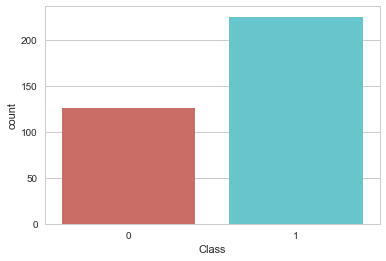

In [8]:
sns.countplot(x='Class',data=df,palette='hls')
plt.rc('font',size=12)
plt.show()

Olhando os valores médios de cada característica para cada classe:

In [9]:
print(df.groupby('Class').mean())

,P1Atr01,P1Atr02,P2Atr01,P2Atr02,P3Atr01,P3Atr02,P4Atr01,P4Atr02,P5Atr01,P5Atr02,...,P13Atr01,P13Atr02,P14Atr01,P14Atr02,P15Atr01,P15Atr02,P16Atr01,P16Atr02,P17Atr01,P17Atr02
Class,,,,,,,,,,,,,,,,,,,,,
0,0.698413,0.0,0.296556,-0.029780,0.242786,0.024207,0.253984,-0.024860,0.312342,0.103458,...,0.250878,-0.072233,0.618174,-0.100919,0.186302,-0.025235,0.127995,0.020880,0.167222,0.054582
1,1.000000,0.0,0.834422,0.085897,0.801706,0.167231,0.715917,0.200124,0.623571,0.224962,...,0.477479,-0.070601,0.498782,-0.051964,0.486046,-0.029403,0.478244,-0.017611,0.451363,-0.007977


Separamos a as características de entrada em dois DataFrames e a classe de saída em dois DataFrames, **dfX** e **dfY**.

In [10]:
dfY=df.Class
dfX=df.drop(axis='columns',labels='Class')
print(dfX.head())
print(dfY.head())

   P1Atr01  P1Atr02  P2Atr01  P2Atr02  P3Atr01  P3Atr02  P4Atr01  P4Atr02  \
0        1        0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1        1        0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2        1        0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3        1        0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4        1        0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   

   P5Atr01  P5Atr02    ...     P13Atr01  P13Atr02  P14Atr01  P14Atr02  \
0  1.00000  0.03760    ...      0.56811  -0.51171   0.41078  -0.46168   
1  1.00000 -0.04549    ...     -0.20332  -0.26569  -0.20468  -0.18401   
2  0.88965  0.01198    ...      0.57528  -0.40220   0.58984  -0.22145   
3  0.00000  0.00000    ...      1.00000   0.90695   0.51613   1.00000   
4  0.77152 -0.16399    ...      0.03286  -0.65158   0.13290  -0.53206   

   P15Atr01  P15Atr02  P16Atr01  P16Atr02  P17Atr01  P17Atr02  
0   0.21266  -0.34090   0.42267  -

Normalizando as características de entrada de modo que: x'=(x-μ)/σ

In [11]:
stdScaler=StandardScaler()
Xscl=stdScaler.fit_transform(dfX)
dfXscl=pd.DataFrame(Xscl,columns=dfX.columns)
print(dfXscl.head())

    P1Atr01  P1Atr02   P2Atr01   P2Atr02   P3Atr01   P3Atr02   P4Atr01  \
0  0.348433      0.0  0.712372 -0.234257  0.484208 -0.201735  0.577059   
1  0.348433      0.0  0.721648 -0.527811  0.634308 -1.037587 -1.339106   
2  0.348433      0.0  0.721648 -0.176998  0.768477 -0.241309  0.914531   
3  0.348433      0.0  0.721648 -1.125172  0.768477  1.921340  0.329433   
4  0.348433      0.0  0.721648 -0.155129  0.655594 -0.109918  0.754068   

    P4Atr02   P5Atr01   P5Atr02    ...     P13Atr01  P13Atr02  P14Atr01  \
0 -0.954679  0.964074 -0.297510    ...     0.297728 -0.867565 -0.253868   
1 -2.029452  0.964074 -0.469482    ...    -1.037790 -0.383054 -1.447849   
2 -0.461494  0.746139 -0.350536    ...     0.310141 -0.651896  0.093506   
3 -2.152585 -1.010873 -0.375331    ...     1.045426  1.926340 -0.049490   
4 -0.676741  0.512838 -0.714742    ...    -0.628910 -1.143025 -0.792950   

   P14Atr02  P15Atr01  P15Atr02  P16Atr01  P16Atr02  P17Atr01  P17Atr02  
0 -0.713971 -0.288290 -0.61703

## Modelos

Abaixo temos um loop para 100 iterações onde realizamos, em cada iteração, as seguintes ações:

* Separamos os conjuntos de treinamento e teste a partir da entrada normalizada ( **dfXscl**) e da saída (**dfY**)
* Criamos as os modelos de regressão linear, MLP e Perceptron
* Realizamos o treinamento (*fit*) dos modelos a partir dos conjuntos separados anteriormente no passo 1
* Calculamos a acurácia de cada modelo e adicionamos a lista com as acurácias do modelo correspondente
* Calculamos a precisão por classe para cada modelo e adicionamos a uma matriz com as precisões por classe

No caso especifico da MLP os melhores parametros foram obtidos com uma única camada oculta, algoritmo de treinamento L-BFGS e função de ativação sigmoide logística. Tolerância do erro de 1.10^-4 e inicializando a taxa de aprendizagem em 0.001.

Já para a regressão linear foram utilizadas duas saídas representando **classe 1** e **classe 0**, depois pegamos a classe final deste modelo.

In [12]:
rnaMLP=[] #cria lista vazia
rnaPerc=[]
LinReg=[]
MlpPrec=np.zeros(shape=(100,2))
LinPrec=np.zeros(shape=(100,2))
PercPrec=np.zeros(shape=(100,2))
for ii in range(0,100):
    # separar conjuntos 
    X_train,X_test,Y_train,Y_test = train_test_split(dfXscl,dfY,test_size=0.2) # separa os conjuntos de teste e treinamento
    Y_train_reg=createDoubleColumn(Y_train) #cria uma coluna extra
    Y_test_reg=createDoubleColumn(Y_test) #cria uma coluna extra
    # criar objetos
    linreg=LinearRegression() #objeto da regressão linear
    mlp=MLPClassifier(hidden_layer_sizes=(20,),solver='lbfgs',activation='logistic',tol=1e-4,learning_rate_init=0.001,max_iter=200) #objeto da MLP
    perc=Perceptron(max_iter=200,tol=1e-3) #objeto do perceptron
    # fits
    linreg.fit(X_train,Y_train_reg) # fit regressão linear
    mlp.fit(X_train,Y_train) #fit MLP
    perc.fit(X_train,Y_train) #fit Perceptron
    # acuracias
    LinOut=linreg.predict(X_test) #obtem a saida da regressão linear, duas colunas
    LinOut=getClass(LinOut) #indica com a classe resultante, aquela com o maior valor da regressão linear
    LinReg.append(accuracy_score(y_pred=LinOut,y_true=Y_test)) #adiciona acuracia a lista
    rnaMLP.append(mlp.score(X_test,Y_test)) #adiciona acuracia a lista
    rnaPerc.append(perc.score(X_test,Y_test)) #adiciona acuracia a lista
    #precisoes por classe
    LinPrec[ii]=precision_score(y_pred=LinOut,y_true=Y_test,average=None)
    MlpPrec[ii]=precision_score(y_pred=mlp.predict(X_test),y_true=Y_test,average=None)
    PercPrec[ii]=precision_score(y_pred=perc.predict(X_test),y_true=Y_test,average=None)
LinReg=np.array(LinReg) #transforma a lista em numpy.array para efetuar calculos.
rnaMLP=np.array(rnaMLP)
rnaPerc=np.array(rnaPerc)

Em seguida calculamos os valores máximo, mínimo e médio da acurácia para cada modelo, além do desvio padrão.

In [13]:
MaxValues=[LinReg.max(),rnaMLP.max(),rnaPerc.max()]
MinValues=[LinReg.min(),rnaMLP.min(),rnaPerc.min()]
MeanValues=[LinReg.mean(),rnaMLP.mean(),rnaPerc.mean()]
StdDev=[LinReg.std(),rnaMLP.std(),rnaPerc.std()]
print(pd.DataFrame({'Max':MaxValues ,'Min': MinValues,'Mean':MeanValues, 'StdDev':StdDev},index=['LinReg','MLP','Percep']))

             Max      Mean       Min    StdDev
LinReg  0.943662  0.858169  0.746479  0.043377
MLP     0.971831  0.887746  0.774648  0.042881
Percep  0.943662  0.840423  0.549296  0.061233


Agora avaliamos a precisão de cada modelo para cada classe:

In [14]:
print(pd.DataFrame([LinPrec.mean(axis=0),MlpPrec.mean(axis=0),PercPrec.mean(axis=0)],index=['LinReg','MLP','Percep']))

               0         1
LinReg  0.941491  0.830443
MLP     0.901457  0.883068
Percep  0.806759  0.865231


## Conclusões Finais
* Podemos ver que a regressão possui uma melhor precisão ao avaliar a **classe 0**, mas a MLP possui um desempenho similar para ambas as classes.  
* A acurácia média da MLP é a maior dentre os três modelos avaliados.
* A melhor desempenho (*max*) também é do modelo MLP.